In [ ]:
# 生成随机数据集，小写字母、大写字母与数字按顺序结合，模拟上下文
# 最终应该实现每一类的词向量应该组合在附近
import random
import string

random.seed(44)

# 生成指定长度的随机小写字母字符串
def generate_lowercase(length):
    return list(''.join(random.choices(string.ascii_lowercase, k=length)))

# 生成指定长度的随机大写字母字符串
def generate_uppercase(length):
    return list(''.join(random.choices(string.ascii_uppercase, k=length)))

# 生成指定长度的随机数字字符串
def generate_digits(length):
    return list(''.join(random.choices(string.digits, k=length)))

# 在字符串中随机插入一定数量的噪声符号
def add_noise(s, noise_count='auto', noise_symbol='!'):
    s = list(s)
    if noise_count == 'auto':
        # 默认插入与字符串总长度10%的噪声（最少1个）
        noise_count = max(1, len(s) // 10)

    for _ in range(noise_count):
        pos = random.randint(0, len(s))  # 插入位置可以是头部、中间或尾部
        s.insert(pos, noise_symbol)
    
    return list(''.join(s))

# 主逻辑部分
length = 400

# 生成各部分
lower = generate_lowercase(length)
upper = generate_uppercase(length)
digit = generate_digits(length)
def data_choice(length):
    """随机选择小写字母、大写字母或数字"""
    edge = []
    for _ in range(length):
        n1 = random.choice(lower)
        n2 = random.choice(lower)
        edge.append((n1, n2))
    for _ in range(length):
        n1 = random.choice(upper)
        n2 = random.choice(upper)
        edge.append((n1, n2))
    for _ in range(length):
        n1 = random.choice(digit)
        n2 = random.choice(digit)
        edge.append((n1, n2))

    random.shuffle(edge)  # 打乱顺序
    return edge
# 按顺序拼接
combined = data_choice(length)

# 加入噪声
noisy_combined = add_noise( ''.join(set(lower + upper + digit)), noise_count='auto')
##小心噪声加入得随机性
# 输出结果
print("随机小写字母组合:", lower)
print("随机大写字母组合:", upper)
print("随机数字组合:    ", digit)
print("拼接后的完整字符串:\n", combined)
print("加入噪声后的字符串:\n", noisy_combined)

随机小写字母组合: ['k', 'o', 'w', 'e', 'f', 'a', 'd', 'a', 'e', 'n', 'z', 's', 'j', 'k', 'r', 'i', 'b', 'v', 'q', 'c', 'b', 'c', 'y', 'c', 'q', 'z', 'a', 'k', 'm', 'x', 'e', 'g', 'g', 'b', 'r', 'v', 'l', 'a', 's', 't', 'q', 'i', 'v', 'q', 'p', 'o', 'g', 'l', 'u', 'r', 'i', 'v', 'v', 'b', 'e', 'f', 'a', 't', 'q', 'o', 'z', 'j', 'f', 'c', 'i', 'v', 'p', 'b', 'l', 'b', 'q', 'd', 'e', 'q', 'v', 'q', 'h', 'q', 'h', 'a', 'h', 'r', 'q', 'f', 'v', 'v', 'h', 'y', 'g', 'b', 'n', 'w', 'p', 'o', 'm', 'h', 'h', 'k', 'o', 'y', 'b', 'g', 'y', 'r', 'b', 'l', 'q', 'x', 'c', 'x', 'u', 'h', 'n', 'v', 'g', 's', 'o', 'b', 'h', 'k', 'd', 'y', 'g', 'g', 'p', 'n', 'i', 'i', 'm', 'x', 'c', 'x', 'y', 'r', 'u', 'j', 'z', 't', 'r', 'l', 'f', 'r', 't', 'a', 'i', 'n', 'f', 'd', 'e', 'a', 'd', 'k', 'n', 'q', 'i', 'd', 'x', 'q', 'r', 'r', 'i', 'p', 'i', 'q', 'v', 'a', 'u', 'd', 'a', 'b', 'o', 'w', 'y', 'e', 'l', 'y', 'x', 'v', 'g', 'h', 'd', 'g', 'k', 'u', 'r', 'e', 'e', 'l', 'x', 'm', 'u', 'r', 'w', 'm', 'j', 'l', 'u', 'h',

In [2]:
##编码
node = {name: i for i, name in enumerate(set(noisy_combined))}
edge = [(node[i[0]], node[i[1]]) for i in combined]
len(node), len(edge)
print(edge[:10])  # 打印前10个边

[(18, 24), (14, 26), (44, 27), (59, 5), (54, 6), (38, 53), (47, 39), (31, 25), (46, 26), (1, 48)]


In [3]:
import torch
##构建负采样集
def get_batch():
    """从边集中随机采样负样本"""
    neg = []
    pos =[]
    sample = random.sample(edge, 4)  #  随机选择4条边
    ##  一个正节点对应两个负样本
    for i in sample:
        n1, n2 = i
        # 将正样本添加到正样本列表中
        pos.append((n1, n2))
        pos.append((n1, n2))#构建无序
        # 随机选择一个节点作为负样本
        while True:
            neg_node = random.choice(list(node.values()))
            # print(neg_node)
            if neg_node != n2 and neg_node != n1:               
                neg.append((n1, neg_node))
            if  neg_node != n1 and neg_node != n2:
                neg.append((neg_node, n2))
                break
    pos = torch.LongTensor(pos)
    neg = torch.LongTensor(neg)
    return pos, neg

get_batch()

(tensor([[19,  6],
         [19,  6],
         [19,  3],
         [19,  3],
         [ 1, 17],
         [ 1, 17],
         [48, 39],
         [48, 39]]),
 tensor([[19, 54],
         [54,  6],
         [19, 15],
         [15,  3],
         [ 1, 39],
         [39, 17],
         [48, 10],
         [10, 39]]))

In [4]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # 定义embeding层，embed的数量是词汇量，转化成维度2
        self.embed = torch.nn.Embedding(num_embeddings=len(node),embedding_dim=2)

        #初始化参数
        self.embed.weight.data.uniform_(-0.01,0.01)

    def forward(self,pos,neg):
        #编码   
        ##[8,6] -> [8,6, 2]
        x = self.embed(pos)
        #[8, 2]-> [8, 2 , 1]
        pos_n1 = x[:,0].unsqueeze(dim = 1)
        #[8,2]-> [8, 2 , 1]
        pos_n2 = x[:,1].unsqueeze(dim = 2)
        
        loss_pos = torch.bmm(pos_n1, pos_n2).squeeze()

       
        ##[8,12] -> [8,12,2]
        y = self.embed(neg)
        #[8, 1, 2]
        neg_n1 = y[:, 0].unsqueeze(dim=1)
        #[8, 2, 1]
        neg_n2 = y[:, 1].unsqueeze(dim=2)
        
        #[8, 1, 2],[8, 2, 1] -> [8]
        loss_neg = torch.bmm(neg_n1, -neg_n2).squeeze()

        loss_pos = loss_pos.sigmoid().log().sum()
        #[8, 12] -> [8]
        loss_neg = loss_neg.sigmoid().log().sum()
        #组合两部分的loss
        #[8] + [8] -> [1]
        loss = (loss_pos + loss_neg).mean()

        return -loss
        

In [5]:
model = Model()
model(*get_batch())


tensor(11.0905, grad_fn=<NegBackward0>)

In [6]:
def test(test_words):
    embed = model.embed.weight.data.clone()

    for word in test_words:
        x = embed[node[word]]
        score = torch.nn.functional.cosine_similarity(x, embed)
        topk = score.topk(k=5).indices
        topk = [list(node.keys())[k] for k in topk]
        print(word, topk)


test(['a', 'g', '1', '5', 'O', 'H'])

a ['a', 'O', 'C', '4', 'M']
g ['g', 'f', 'X', 'c', 'z']
1 ['1', 'N', 'b', '2', '9']
5 ['5', 'w', '2', 'N', '1']
O ['O', 'a', 'C', 'M', '0']
H ['H', '9', '7', 'b', '1']


In [9]:
from tqdm   import tqdm
def train():
    global model
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    loss_sum = 0
    for epoch in range(20001):
        batch = get_batch()
        batch = [i.to(device) for i in batch]

        loss = model(*batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

        if epoch % 5000 == 0:
            print(epoch, loss_sum)
            test(['a', 'g', '1', '5', 'Q', 'H'])
            loss_sum = 0

    model = model.cpu()


train()

0 9.17432975769043
a ['a', 'q', 'x', 'i', 't']
g ['g', 'o', 'c', 'p', 'k']
1 ['0', '1', '8', '9', '6']
5 ['5', '3', '4', '6', '1']
Q ['Q', 'K', 'S', 'J', 'N']
H ['H', 'O', 'R', 'U', 'P']
5000 38918.81765913963
a ['a', 'x', 'l', 'i', 'h']
g ['g', 'd', 'm', 'z', 'p']
1 ['1', '0', '5', '9', '4']
5 ['5', '9', '4', '1', '0']
Q ['Q', 'T', 'G', 'I', 'E']
H ['H', 'O', 'R', 'A', 'C']
10000 38709.95207166672
a ['a', 'i', 'l', 'e', 'x']
g ['g', 'c', 'z', 'u', 'r']
1 ['1', '8', '0', '7', '6']
5 ['5', '2', '9', '4', '6']
Q ['Q', 'J', 'K', 'Z', 'P']
H ['H', 'N', 'C', 'P', 'Z']
15000 38635.84590816498
a ['a', 'c', 'q', 'x', 'y']
g ['g', 'z', 'i', 'w', 'm']
1 ['1', '0', '8', '9', '7']
5 ['5', '2', '3', '0', '1']
Q ['Q', 'O', 'S', 'A', 'Y']
H ['H', 'L', 'V', 'Y', 'C']
20000 38544.6065428257
a ['a', 't', 'v', 'n', 'c']
g ['g', 's', 'c', 'n', 'v']
1 ['1', '9', '3', '0', '4']
5 ['5', '7', '6', '2', '8']
Q ['Q', 'J', 'P', 'H', 'S']
H ['H', 'P', 'S', 'A', 'I']


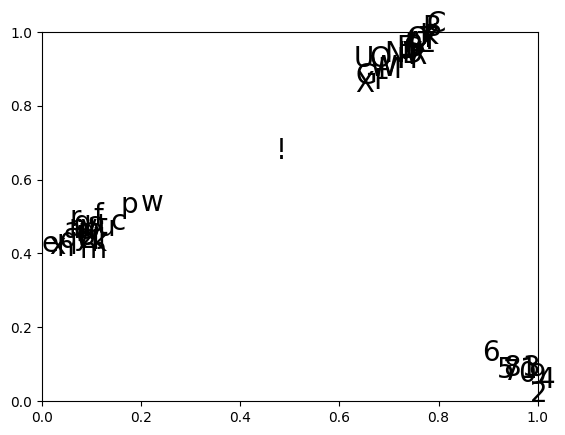

In [10]:
from matplotlib import pyplot as plt
# %matplotlib inline
def show():

    embed = model.embed.weight.data.clone()
    embed -= embed.min(dim=0).values
    embed /= embed.max(dim=0).values

    for word,x in node.items():
        x = embed[x]
        plt.text(x[0],x[1],word,fontsize=20)
    plt.show()

show()
